Member: Nancy, Chisom, Jerome, Justin, Sayaka

This dataset was downloaded from Kaggle.com. The data were obtained by Klenn Dungaran by scraping data from the https://www.lamudi.com.ph/ website. Lamudi is an international firm operating in the Philippines, Indonesia, and Mexico. Lamudi maintains an online platform containing real estate data on a wide variety of properties. The platform enables buyers, sellers, real estate professionals, and members of the public to connect with each other and post and find properties of interest.

The dataset was posted on 20 March 2024. The dataset consists of 1,500 property records. Information on the site indicates the dataset will be updated annually. It is not possible to determine whether the data are for all areas in the Philippines or only certain geographical areas. The dataset contains records on single-family homes, townhomes, and (it appears) vacant lots. The type of property is not coded; the properties are described with a freeform textual description.

There are nine variables in the dataset: description, location, price (in Philippine pesos), number of bedrooms, number of bathrooms, floor area, lot area, latitude, and longitude. Forty-nine records had missing price data; 37 records had missing floor area. It is assumed the records with missing floor area were lots with no houses. To clean the data, the observations with missing data were deleted, leaving 1,416 records for analysis. All 1,416 records had floor area, so presumably they are all dwelling units, either single-family homes or townhomes.

The following research questions guided our analysis:

· What is the range of prices of residential dwelling unit? (histogram)

· What is the relationship between floor area and price? (scatterplot)

· What are the correlations between Price_USD and Floor Area, Bathrooms and Bedrooms? (correlation)

· What is the median price of the residential units? (median)

The research questions will be answered by examining a subset of the file drawn randomly from the larger dataset.


**Import Libraries**

In [107]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt
import seaborn as sns

**Load csv file**

In [108]:
  from google.colab import files
uploaded = files.upload()

Saving Housing_v2.csv to Housing_v2.csv


**Create a dataframe**

In [109]:
import io
housing_df = pd.read_csv(io.BytesIO(uploaded["Housing_v2.csv"]))

**Review Data**

Clean dataset by changing headers to lower case and removing NAs, blanks

In [110]:
drop_na_housing_df = housing_df.dropna()
drop_na_housing_df.columns = drop_na_housing_df.columns.str.lower()
drop_na_housing_df.head()

,description,location,price,bedrooms,bathrooms,floor area,land area,latitude,longitude
0,Preselling 2-Storey Townhouses in Village East...,"Santo Domingo, Cainta",9500000.00,4.00,3.00,144.00,136.00,14.58,121.12
1,Affordable House & Lot with Complete Amenities...,"San Vicente, Santa Maria",4400000.00,3.00,2.00,63.20,80.00,14.81,121.00
4,Futura Homes Zamboanga | Amber 2BR Townhouse E...,"Zambowood Rd. Boalan, Zamboanga",3275000.00,2.00,1.00,40.32,78.40,6.95,122.11
7,"5BR 2-Storey House and Lot for Sale in Subic, ...","Aningway Sacatihan, Subic",8428000.00,5.00,3.00,142.00,121.00,14.91,120.23
9,3BR 3-Storey Townhouse for Sale near Alabang i...,"Km. 19 West Service Rd. Cupang, Muntinlupa",28650000.00,3.00,3.00,219.30,90.00,14.43,121.05


**Descriptive Statistics for Prices in Pesos**

In [111]:
drop_na_housing_df['price'].describe()

count         1055.00
mean      35323036.65
std       87078973.52
min         869000.00
25%        5453500.00
50%       10500000.00
75%       27088000.00
max     1200000000.00
Name: price, dtype: float64

Convert the Price column values from pesos to USD current rate.




In [65]:
##drop_na_housing_df['price']=drop_na_housing_df['price'].apply(lambda x : x*0.018)

<ipython-input-65-f4635965c98a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_na_housing_df['price']=drop_na_housing_df['price'].apply(lambda x : x*0.018)


**Convert Pesos to USD**

In [112]:
exchange_rate = 0.018
drop_na_housing_df ['Price_USD']= drop_na_housing_df['price']* exchange_rate

<ipython-input-112-bee938b24a1a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_na_housing_df ['Price_USD']= drop_na_housing_df['price']* exchange_rate


In [113]:
drop_na_housing_df['Price_USD'].describe()

count       1055.00
mean      635814.66
std      1567421.52
min        15642.00
25%        98163.00
50%       189000.00
75%       487584.00
max     21600000.00
Name: Price_USD, dtype: float64

**Histogram  of Real Estate Prices**

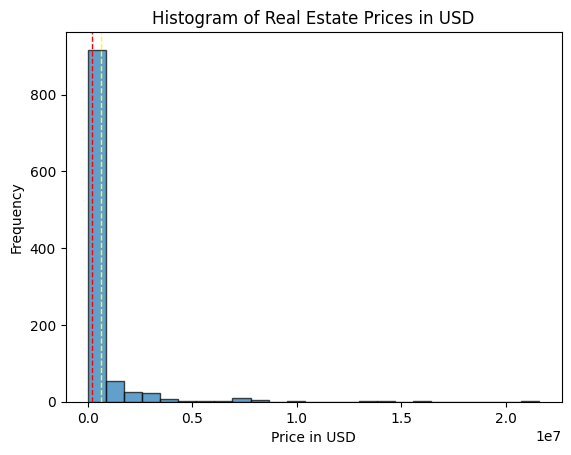

In [114]:
drop_na_housing_df["Price_USD"].plot.hist(bins=25, edgecolor = "k", alpha=0.7)
plt.title("Histogram of Real Estate Prices in USD")
plt.axvline(drop_na_housing_df["Price_USD"].mean(), color = "yellow", linestyle = "dashed", linewidth = 1)
plt.axvline(drop_na_housing_df['Price_USD'].median(), color = 'red', linestyle = "dashed", linewidth = 1)
plt.xlabel("Price in USD")
plt.show()


The mean (*yellow*) is 63,5815 and the median (*red*) is 189,000 dollars.

**Scatter Plot of Floor Area as a Predictor of Price**

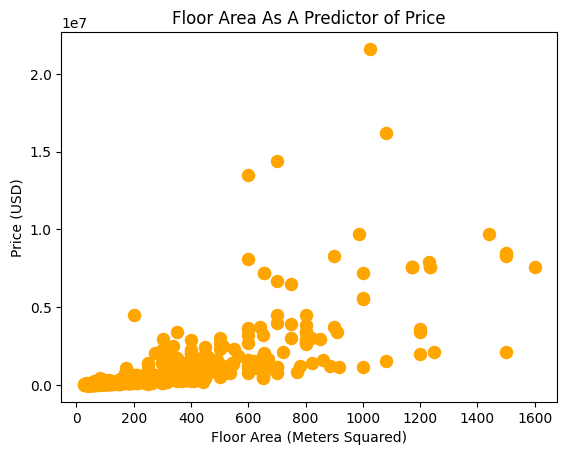

In [96]:

drop_na_housing_df.plot.scatter(x='floor area', y='Price_USD', s =75, c = "orange")
plt.title('Floor Area As A Predictor of Price')
plt.xlabel('Floor Area (Meters Squared)')
plt.ylabel('Price (USD)')
plt.show()

In [97]:
drop_na_housing_df['Price_USD'].corr(drop_na_housing_df['floor area'])

0.7275725027984233

There appears to be a positive correlation prices increase with increase in floor area

**Bar Plot for Bedrooms and Price_USD**

<ipython-input-99-ca9e439a4d98>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_na_housing_df['Price_USD'] = drop_na_housing_df['price'] * exchange_rate


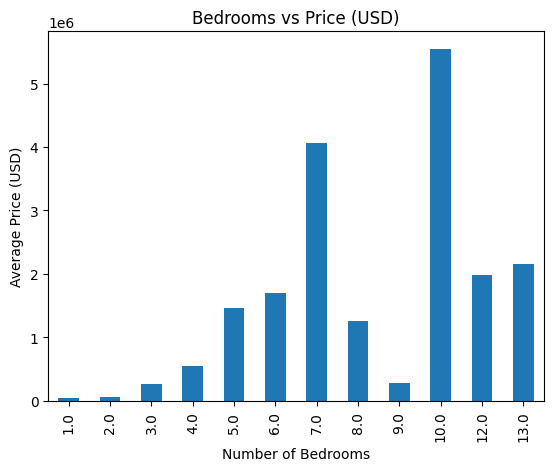

In [99]:
import matplotlib.pyplot as plt

# Create exchange rate
exchange_rate = 0.018
drop_na_housing_df['Price_USD'] = drop_na_housing_df['price'] * exchange_rate


# create plot
plot = drop_na_housing_df.groupby('bedrooms')['Price_USD'].mean().plot(kind='bar')

# Set title, labels, and display the plot
plt.title('Bedrooms vs Price (USD)')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price (USD)')

# Set y-axis scale to linear
plot.get_figure().get_axes()[0].set_yscale('linear')

plt.show()

**Boxplot for Bedrooms and Price_USD**

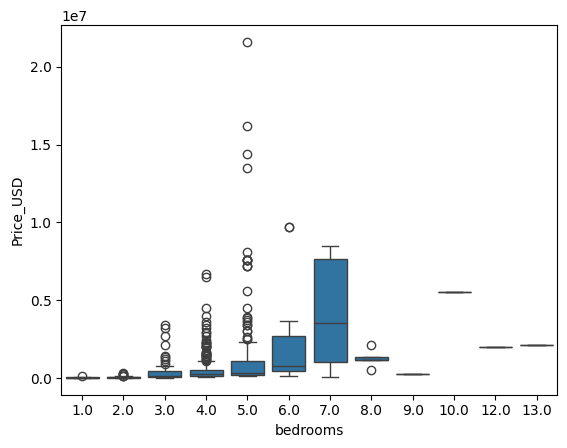

In [101]:
import seaborn as sns


sns.boxplot(x="bedrooms", y="Price_USD", showfliers = True, data=drop_na_housing_df)  # Replace 'housing' with your DataFrame name

# Set y-axis scale to linear
plt.yscale('linear') # This ensures the y-axis displays actual value

plt.show()

**Additional Correlations**

In [102]:
#Calculate correlations
correlations = drop_na_housing_df[['price', 'floor area', 'bathrooms', 'bedrooms']].corr()

print(correlations)

            price  floor area  bathrooms  bedrooms
price        1.00        0.73       0.36      0.37
floor area   0.73        1.00       0.60      0.65
bathrooms    0.36        0.60       1.00      0.63
bedrooms     0.37        0.65       0.63      1.00


**Selecting the original sample for Bootstrapping**

In [103]:
original_sample = drop_na_housing_df['Price_USD'].sample(frac=0.1, replace = True, random_state=123)

In [77]:
print(np.median(original_sample))

167283.0


**Bootstrapping for median_boot_samples**

In [104]:
median_boot_samples =[]
for i in range(1000):
  boot_sample = np.random.choice(original_sample, 100)
  median_boot_samples.append(np.median(boot_sample))
np.mean(median_boot_samples)

178371.2898

**Creating Confidence Intervals from the Bootstrapping Samples**

In [105]:
conf_int = np.percentile(median_boot_samples, [2.5, 97.5])
conf_int

array([140760., 288000.])

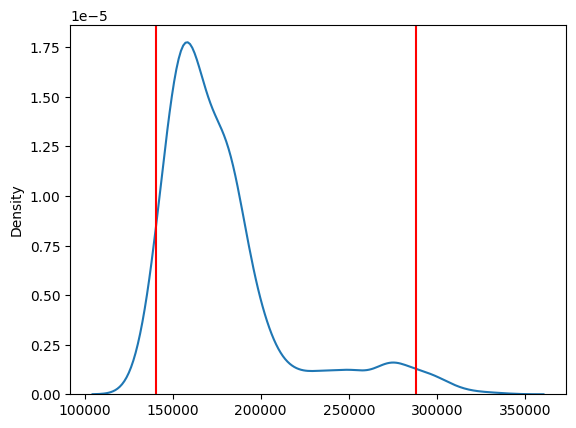

In [106]:
import seaborn as sns
sns.kdeplot(median_boot_samples)
for endpoint in conf_int:
  plt.axvline(endpoint, color = 'red')

**Conclusion**

Our analysis of a sample of this Philippine housing data shows a wide variation
in prices, with most prices at the lower range.  

The minimum and maximum price of  properties in the dataset is 15,642 / 21,600,000 dollars respectively.

While the mean property price is $635,814.00

with a large standard deviation of $1,567,422.  

Floor area is the best predictor of price; correlations with number of bedrooms and bathrooms are half or less of the correlation with floor area.  

Not surprisingly, the larger the dwelling unit, the higher the price.